In [1]:
import os
import sys
# Root folder
sys.path.append("../..")

import numpy as np
from PIL import Image


from utils.image_utils import annotate_positions_in_mask

/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
image = Image.open("../assets/images/table_with_notebook.jpg").resize((320, 240))

In [31]:
x = np.arange(0.1, 1.01, 0.33)
y = np.arange(0.1, 1.01, 0.33)

# Create the meshgrid
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
positions = np.vstack([X, Y]).T

mask = np.ones((image.width, image.height))
output = annotate_positions_in_mask(image, mask, positions)

In [32]:
positions

array([[0.1 , 0.1 ],
       [0.43, 0.1 ],
       [0.76, 0.1 ],
       [0.1 , 0.43],
       [0.43, 0.43],
       [0.76, 0.43],
       [0.1 , 0.76],
       [0.43, 0.76],
       [0.76, 0.76]])

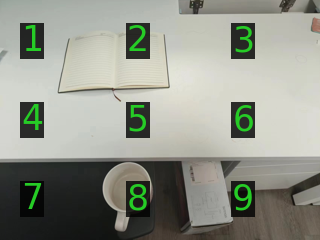

In [33]:
output

In [37]:
from apis.language_model import LLaVA, GEMINI_PRO_VISION, GPT4V

gemini_pro_vision = GEMINI_PRO_VISION()

gpt4v = GPT4V()


In [56]:
prompt = "I want to put a object on the book without collision. Tell me the number dirctly."
response = gpt4v.chat(prompt, output)

print("\nResponse:\n", response, '\n', '_'*50)


Response:
 2 
 __________________________________________________


In [7]:
from apis.language_model import LLaVA

llava = LLaVA()

prompt = "Which area is empty?"
response = llava.chat(prompt, output)

print("\nLLaVA responded:\n", response, '\n', '_'*50)



LLaVA responded:
 USER:  

Which area is empty?
ASSISTANT: The area marked with the number 3 is empty. 
 __________________________________________________


In [8]:
from apis.language_model import LLaVA

llava = LLaVA()

prompt = "What is under the number 3?"
response = llava.chat(prompt, output)

print("\nLLaVA responded:\n", response, '\n', '_'*50)



LLaVA responded:
 USER:  

What is under the number 3?
ASSISTANT: Under number 3, there is a book. 
 __________________________________________________
